## Labo Week 4 : Data Cleaning + KNN

#### Deel 1 : Data Cleaning met Pandas

80\% van zijn tijd spendeert een data scientist aan het opkuisen van de data. Pandas is een ideale tool om data op te kuisen. In deel 1 overlopen we verschillende handige data cleaning acties.

__Oefening 1__ 

**1.1** Lees de olympicsdata file in als een pandas dataframe. Hierbij mag je de eerste lijn overslaan omdata deze geen zinnige data bevat. Bekijk de info van deze file via de gekende functies : $head$, $info$, $describe$, ... Deze data is gebaseerd op de _unranked medal table_ uit <https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table>

**1.2** Merk op dat de kolomnamen niet eenduidig zijn. Wijzig deze zodat je logische kolomnamen bekomt.

**1.3** De eerste kolom bevat tekstdata met oa. de naam van een land / olympische deelname, alsook de code. Zorg ervoor dat de 3 letter code die tussen ronde haken staat de nieuwe index van de dataframe wordt. Verder kuis je de tekst in kolom1 op zodat alleen de naam van het land / deelname overblijft (het stuk tekst voor de ronde haak). Maak hier gebruik van de  `apply` functie.

**1.4** Ga na hoeveel data ontbreekt in je dataframe.  Maak hiertoe een nieuwe dataframe aan. De eerste kolom is het aantal ontbrekende waarden voor 
elke kolom. De tweede kolom is het percentage van ontbrekende waarden.

_Tip :_ gebruik de `isnull` methode.

**1.5**  Het percentage ontbrekende waarden is eigenlijk verwaarloosbaar. Daarom mag je elke ontbrekende waarde wijzigen naar 0. Test zelf of je operatie gelukt is door opnieuw het totaal aantal ontbrekende waarden in je Dataframe te tellen.

_Tip :_ gebruik de `fill_na` methode.

**1.6** Via `info` of `dtypes` kan je nagaan of de types van de data in de verschillende kolommen wel logisch is. Ga dit na en pas deze aan naar het meest logische type. Behalve de kolom die de landnaam voorstelt zijn alle andere data gewoon gehele getallen, int64 is dus prima!

In [97]:
import pandas as pd
import numpy as np

def get_countryname(item):
    if '(' in item:
        return item[:item.find('(')]
    elif '[' in item:
        return item[:item.find('[')]
    else:
        return item

olympicsdata =pd.read_csv('olympicsdata2.csv',skiprows=1, sep = ';')
#print("\n\n" , olympicsdata.head())
#print("\n\n" , olympicsdata.info())
#print("\n\n" , olympicsdata.describe())

#1.2
olympicsdata.columns = ['countryname', 'Nr Summer', 'Summer #1', 'Summer #2', 'Summer #3', 'Summer total medals', 'Nr Winter', 'Winter #1', 'Winter #2', 'Winter #3', 'Winter total medals', 'combined', 'combined #1', 'combined #2', 'combined #3', 'total medals']

#1.3
new_index = list(olympicsdata['countryname'].astype(str).str[-4:-1])
olympicsdata['index'] = new_index
olympicsdata.set_index('index', inplace = True)

olympicsdata['countryname'] =  olympicsdata['countryname'].apply(get_countryname)

#oef 1.4
column1 = []
column2 = []

for index, row in olympicsdata.iterrows():
    column1.append(np.count_nonzero(pd.isnull(row)))
    column2.append(np.count_nonzero(pd.isnull(row)) / 16 * 100)

new_df = pd.DataFrame({'missing data':column1, 'percentage data':column2, 'index': new_index})
new_df.set_index('index', inplace = True)

#oef 1.5
olympicsdata.fillna(0, inplace = True)

column3 = []
column4 = []

for index, row in olympicsdata.iterrows():
    column3.append(np.count_nonzero(pd.isnull(row)))
    column4.append(np.count_nonzero(pd.isnull(row)) / 16 * 100)

new_df_2 = pd.DataFrame({'missing data':column3, 'percentage data':column4, 'index': new_index})
new_df_2.set_index('index', inplace = True)

new_df_2

#oef 1.6

float_col = olympicsdata.select_dtypes(include=['float64'])

for col in float_col.columns.values:
    olympicsdata[col] = olympicsdata[col].astype('int64')

olympicsdata.dtypes


countryname            object
Nr Summer               int64
Summer #1               int64
Summer #2               int64
Summer #3               int64
Summer total medals     int64
Nr Winter               int64
Winter #1               int64
Winter #2               int64
Winter #3               int64
Winter total medals     int64
combined                int64
combined #1             int64
combined #2             int64
combined #3             int64
total medals            int64
dtype: object

#### Deel 2 : KNN

__Oefening 2__ Kennismaking met K-NN classificatie

Gegeven volgende beperkte datset :

|     naam    | zoetheid |  krokantheid  |   soort  |
|-------------|:--------:|:-------------:|---------:|
| pompelmoes  |    6     |      5        | fruit    |
| groene boon |    3     |      7        | groente  |
|    ui     |    3     |      6        | groente |
|  appelsien  |    7     |      3        | fruit    |
|  jona gold  |    6     |      6        | fruit    |
|  granny smith  |    4     |      7       | fruit    |
|  paprika  |    5     |      6        | groente    |
|  pompoen  |    4     |      2        | groente    |
|  mango  |    9     |      3        | fruit    |
|  framboos  |    4     |      1        | fruit    |

We wensen nu voor 2 onbekende ingredienten te beslissen tot welke categorie ze behoren : _fruit of groente_ . Deze ingredienten zijn :

|  naam     | zoetheid |  krokantheid  |   soort  |
|-----------|:--------:|:-------------:|---------:|
|  tomaat   |     6    |       4       |     ?    |
|  wortel   |     4    |       9       |     ?    |

Gebruik K-NN om deze classificatie te doen. 

**2.1** Doe dit eerst visueel voor $k =  1$ : m.a.w. plot de trainings- en test data in het vlak en bepaal visueel de classificatie. Geef dezelfde kleur aan data uit dezelfde klasse.

**2.2** Gebruik vervolgens de KNeighborsClassifier van module sklearn om de voorspellingen te doen. Doe dit eerst voor $k=1$ daarna voor $k=3,k=5$ en tenslotte $k= 7$. Kan je deze classificaties logisch verklaren?


Test set predictions k = 1:
 ['fruit' 'fruit']
Test set predictions k = 3:
 ['fruit' 'groente']
Test set predictions k = 5:
 ['fruit' 'groente']
Test set predictions k = 7:
 ['fruit' 'fruit']


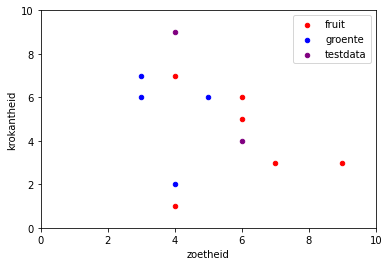

In [125]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = [
['pompelmoes' , 6, 5, 'fruit'],
['groene boon', 3, 7, 'groente'],
['ui', 3, 6, 'groente'],
['appelsien', 7, 3, 'fruit'],
['jona gold', 6, 6, 'fruit'],
['granny smith', 4,7, 'fruit'],
['paprika',5,6,'groente'],
['pompoen',4,2,'groente'],
['mango',9,3,'fruit'],
['framboos',4,1,'fruit']]

data2=[
    ['tomaat', 6,4],
    ['wortel',4,9]
]

trainingsdt = pd.DataFrame(data, columns = ['naam', 'zoetheid', 'krokantheid','soort'])
testdt = pd.DataFrame(data2, columns = ['naam', 'zoetheid', 'krokantheid'])

ax = trainingsdt.loc[trainingsdt['soort'] == 'fruit'].plot.scatter(x="zoetheid", y="krokantheid", color="red", label ="fruit", xlim = (0,10), ylim = (0,10))
trainingsdt.loc[trainingsdt['soort'] == 'groente'].plot.scatter(x="zoetheid", y="krokantheid", color="blue", label="groente", ax=ax)
testdt.plot.scatter(x="zoetheid", y="krokantheid", color="purple", label="testdata", ax=ax)

X_train = trainingsdt[['zoetheid','krokantheid']]
Y_train = trainingsdt['soort']

X_test = testdt[['zoetheid','krokantheid']]

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
print("Test set predictions k = 1:\n", y_pred)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
print("Test set predictions k = 3:\n", y_pred)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
print("Test set predictions k = 5:\n", y_pred)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
print("Test set predictions k = 7:\n", y_pred)

__Oefening 3__ Afstandsmaten

Het KNN algoritme steunt op het berekenen van afstanden tussen datapunten om dichte buren te kunnen bepalen. Er zijn echter verschillende keuzes die je kan maken om afstanden te berekenen.
De meest voorkomende afstandsmaten die gebruikt worden in data science zijn :

    * De Euclidische afstandsmaat (Minkowski met p=2)
    * De Manhattan afstandsmaat (Minkowski met p=1)
    * De cosinus similarity
    * Chebyshev
    
**2.1** Bereken in het voorbeeld van hierboven de afstand van de twee testdatapunten (tomaat en wortel) t.o.v. alle andere datapunten in de dataset. Dit is wat de KNeighborsClassifier achter de schermen ook doet. Je kan de afstandsmaten vinden in de module `scipy.spatial.distance` zie ook : <https://docs.scipy.org/doc/scipy/reference/spatial.distance.html>
Doe dit voor de 4 opgegeven afstandsmaten en neem de resultaten telkens op in een aparte pandas dataframe zoals hier voor de euclidische afstandsmaat :


 
 | euclidean    | tomaat |  wortel | |         
 |-------------|:------:|:-------:|    |        
 |  pompelmoes |   ?     |     ?   | |          
 | groene boon |   ?     |   ?     | |          
 |    ui     |     ?   |     ?    |   |         
 |  appelsien  |     ?   |   ?      | |         
 |  jona gold  |     ?   |   ?      |  |      
 |  granny smith |     ?   |   ?      |  |      
 |  paprika |     ?   |   ?      |   |          
 |  pompoen |     ?   |   ?      | |          
 |  mango |     ?   |   ?      |   |         
  | framboos |     ?   |   ?      |  |         
 



**2.2** Zou de classificatie anders gebeuren door het wijzigen van de afstandsmaat? Test dit eveneens door de metriek parmeter van de KNeighborsClassifier anders in te stellen.

    

In [ ]:
jasper

__Oefening 4__ train-test-split

Om je leermodel op een onafhankelijke manier te kunnen evalueren moet je ervoor zorgen dat je dit model test op data die het niet gebruikt heeft om te leren. De methode `train_test_split` uit de module `sklearn.model_selection` kan hier handig voor gebruikt worden.

**4.1** Genereer eerst je data **X** als een 2dim numpy array met hierin 12 rijen en 2 kolommen. Als data elementen voorzie je gewoon de getallen 1 t.e.m. 25.

Genereer nu ook je labels **Y** als een numpy array van dim 1 met lengte 12. De data elementen van deze array zijn hier de classificatielabels 0 of 1, willekeurig gekozen. (Maak bijvoorbeeld gebruik van `np.random.randint`)

**4.2** Split nu je data via de `train_test_split` methode en vang de 4 resultaten op. Doe dit op volgende manieren :
    
    * zonder parameterinstellingen. Herhaal de oproep enkele keren. Ga telkens na hoe je 4 resultaten eruit zien.
    * stel nu een randomstate in en herhaal opnieuw enkele oproepen. Varieer ook met de waarde van randomstate zelf.
    * stel zelf de groote van de training en/of test set in. Dit kan absoluut of procentueel.
    * Wat is het effect van de parameter shuffle = False ?
    * wat is het effect van de parameter stratify ?


In [ ]:
atal abasin

**Oefening 5**  K-NN regressie met sklearn

**5.1** Lees het bestanden _auto.csv_ in als een dataframe. Ga na wat deze data precies inhoudt en hoe omvangrijk ze is. 

De bedoeling is dat je een leermodel opstelt om te voorspellen hoeveel het verbuik is van de wagen (in miles /gallon) gegeven de afgelegde weg (in miles) en de pk waarden van de wagen.

**5.2** Maak gebruik van de $train\_test\_split$ methode om je data op te splitsen in training versus test data. Neem 30% van de data als testdata, 70% van de data als trainingsdata.

**5.3** Ga eerst na wat in dit geval een goede waarde voor $k$ zou zijn. Gebruik   
  hiervoor de Elbow-methode. Als error bereken je de _mean-squared_error (mse)_  voor elke k-waarde die je test. Plot de _elbow_ uit in een grafiek (m.a.w. voor elke geteste k de bijbehorende $mse$). De $k-waarden$ neem je oneven als volgt :
  ```
  k_waarden = np.arrange(1,20,2)
  ```
  De $mse$ is het gemiddelde van het verschil van de kwadraten tussen elke voorspelde waarde en zijn werkelijke waarde :
  
  \begin{equation}
  mse = \frac{1}{len(testset)} \sum_i (y_{i\;predicted} - y_{i\;expected})^2
  \end{equation}
  Gelukkig kan python die ook gewoon voor je berekenen : nl. via de $mean\_squared\_error$ methode uit : $sklearn.metrics$

Test zeker ook uit wat het effect is van de parameter $random\_state$ in je oproep van de $train\_test\_split$ methode die je hierboven gebruikte om je testset te genrereren.

**5.4** Werk nu verder met de $k$-waarde die een minimale error geeft in je grafiek. Train je model en bereken de accuracy en de mse op je test set. Maak een plot waarbij je voor de test data de voorspelde en werkelijke mpg waarde uitplot. Neem als waarde voor de X-as gewoon de range(1,119) een nummering over het aantal elementen uit je test set.



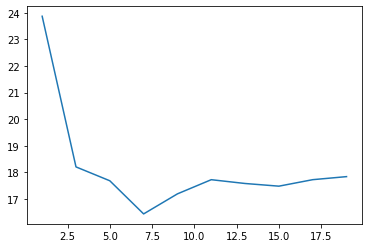

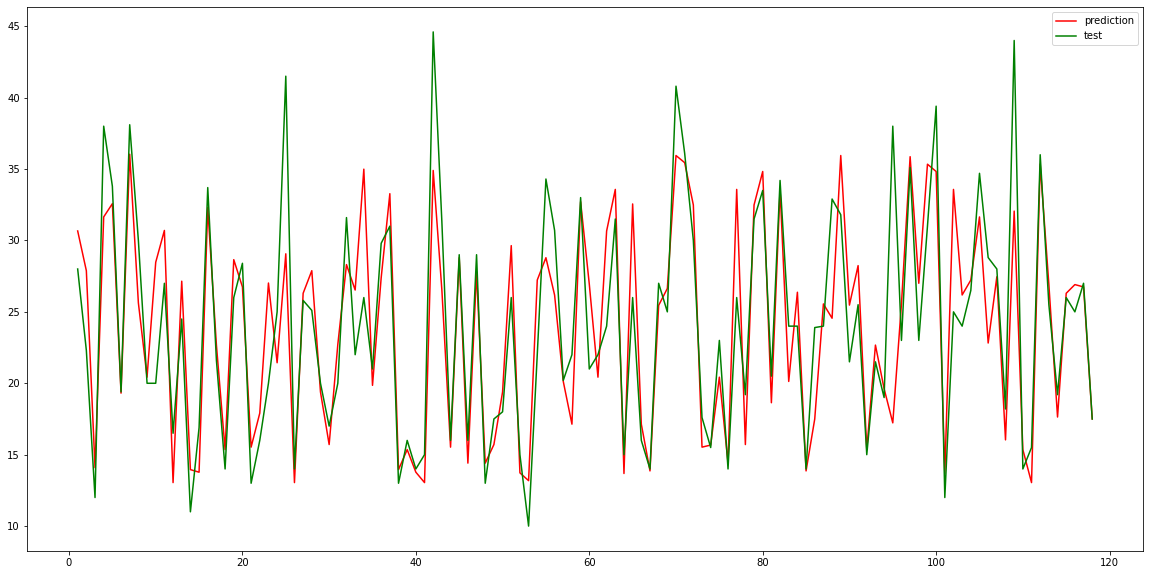

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

autodata = pd.read_csv('auto.csv')

x_train, x_test, y_train, y_test = train_test_split(
    autodata[['displacement','horsepower']], autodata['mpg'], random_state= 0, test_size=0.3)

k_waarden = np.arange(1,20,2)
errors = []

for k in k_waarden:
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    #error = math.sqrt(mse(y_test, pred))
    error = mse(y_test, pred)
    errors.append(error)
fig1 = plt.figure(1)
plt.plot(k_waarden, errors)

#model opbouwen
model2 = KNeighborsRegressor(n_neighbors = 11)
#trainen
model2.fit(x_train, y_train)
#voorspelling maken
prediction = model2.predict(x_test)
#mse berekenen
error = mse(y_test, prediction)

#model2.score(x_test, y_test)

x_values = range(1,119)
fig2= plt.figure(2, figsize=(20,10))
plt.plot(x_values, prediction, '-r' ,label='prediction')
plt.plot(x_values, y_test, '-g' ,label='test')   
# wat is dit, eens vragen
# plt.plot(prediction, '-r' ,label='prediction')
# plt.plot(y_test, '-g' ,label='test')   
plt.legend(loc='upper right')
plt.show()